In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.shape

(400, 5)

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = dataset.iloc[:,2:4]
y = dataset.iloc[:,-1]

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
X[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.80)

In [10]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = logistic.predict(x_test)
accuracy_score(y_pred,y_test)

0.840625

In [74]:
svm = SVC(kernel='rbf',gamma='auto')
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
y_pred = svm.predict(x_test)

In [76]:
accuracy_score(y_pred,y_test)

0.89375

In [77]:
x1 = np.arange(min(x_train[:,0]) - 1, max(x_train[:,0]) + 1, 0.01)
x2 = np.arange(min(x_train[:,1]) - 1, max(x_train[:,1]) + 1, 0.01)

xx,yy = np.meshgrid(x1,x2)

In [78]:
xx.shape

(594, 583)

In [79]:
x = np.array([xx.flatten(),yy.flatten()]).T

In [80]:
x.shape

(346302, 2)

In [81]:
z = svm.predict(x)

In [82]:
z.shape

(346302,)

In [83]:
z = z.reshape(xx.shape)

In [84]:
z.shape

(594, 583)

In [85]:
# plt.scatter(X[:,0],X[:,1],c=y)
from matplotlib.colors import ListedColormap

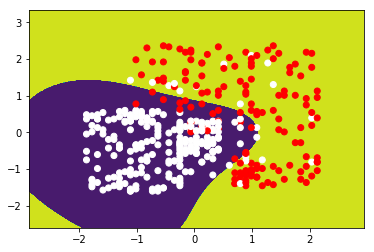

In [86]:
# plt.contour(xx,yy,z)
plt.contourf(xx,yy,z)
plt.scatter(X[:,0],X[:,1],c=y,cmap=ListedColormap(('white','red')))